In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from Excel sheets
df = pd.read_csv('zomato.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
5,2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522
6,2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732
7,2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001
8,2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419
9,2021-08-05,138.750000,138.899994,132.000000,134.949997,134.949997,38437134


In [4]:
# Assuming 'date_column' is the name of the column containing the date
# Convert date format from 'yyyy-mm-dd' to 'm/d/yyyy'
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')

# Write back to the CSV file
df.to_csv('updated_file.csv', index=False)

In [5]:
df.shape

(631, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


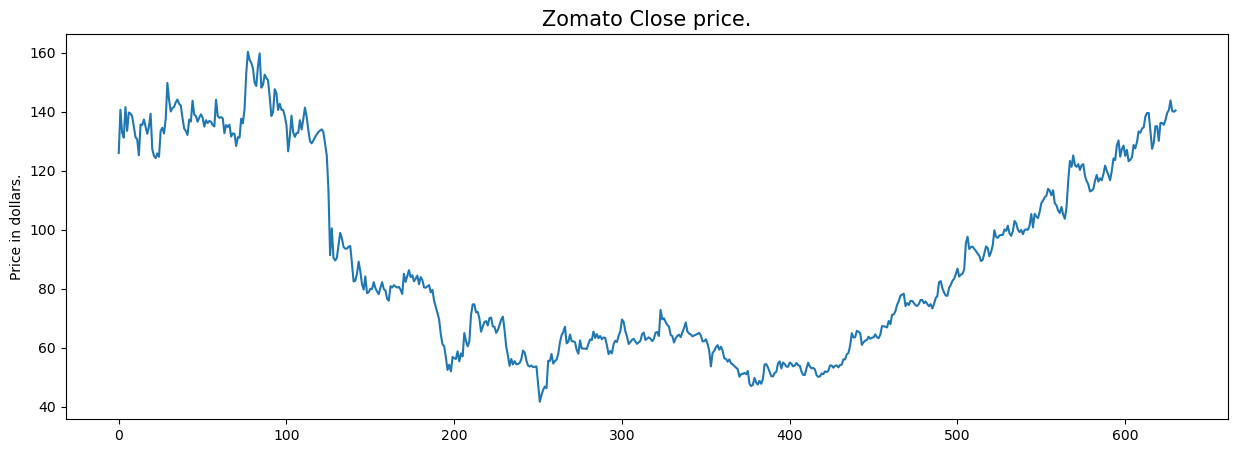

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Zomato Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,07/23/2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,07/26/2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,07/27/2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,07/28/2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,07/29/2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [9]:
df[df['Close'] == df['Adj Close']].shape

(631, 7)

In [10]:
df = df.drop(['Adj Close'], axis=1)

In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

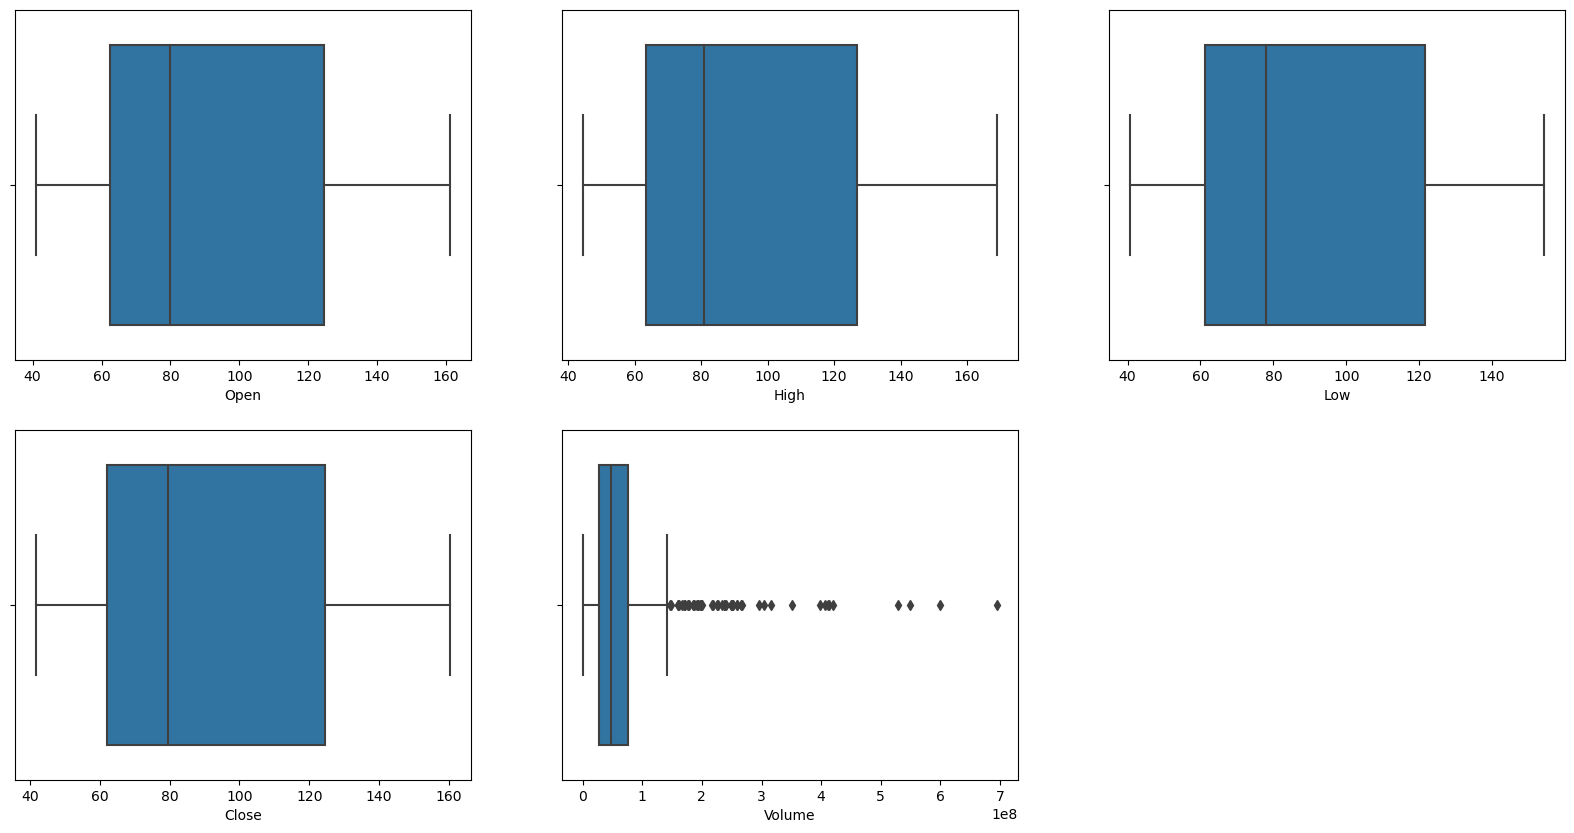

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

#While the volume column contains many outliers, the OHLC columns are largely free of errors.

In [15]:

splitted = df['Date'].str.split('/', expand=True)
 
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,07/23/2021,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021
1,07/26/2021,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021
2,07/27/2021,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021
3,07/28/2021,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021
4,07/29/2021,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021


In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,07/23/2021,116.000000,138.899994,115.000000,126.000000,694895290,23,7,2021,0
1,07/26/2021,126.349998,143.750000,125.300003,140.649994,249723854,26,7,2021,0
2,07/27/2021,141.699997,147.800003,127.750000,132.899994,240341900,27,7,2021,0
3,07/28/2021,131.000000,135.000000,123.550003,131.199997,159793731,28,7,2021,0
4,07/29/2021,134.949997,144.000000,132.199997,141.550003,117973089,29,7,2021,0


In [19]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


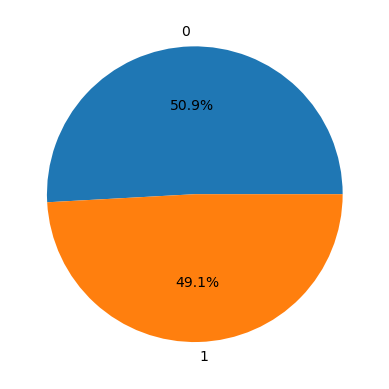

In [20]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


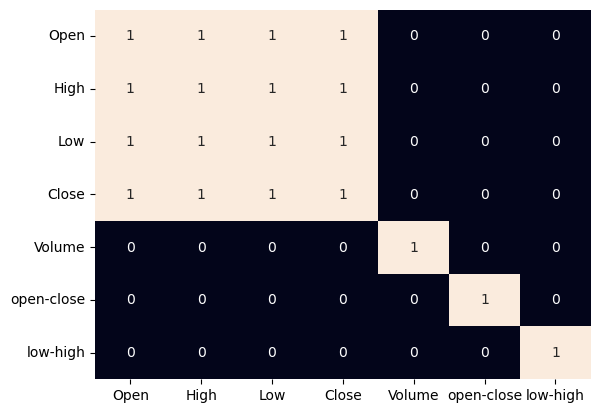

In [25]:
# Exclude non-numeric columns from correlation computation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap
sb.heatmap(correlation_matrix > 0.9, annot=True, cbar=False)
plt.show()

#As we can see here, there is a great deal of correlation between OHLC columns.

In [26]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(567, 3) (64, 3)


In [30]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5576908715242339
Validation Accuracy :  0.484375

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.42838117049612906
Validation Accuracy :  0.537109375

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.99

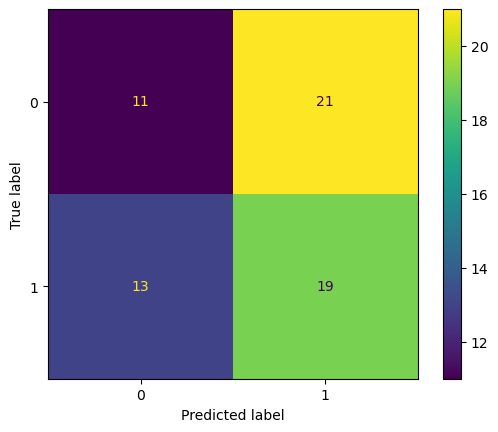

In [31]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

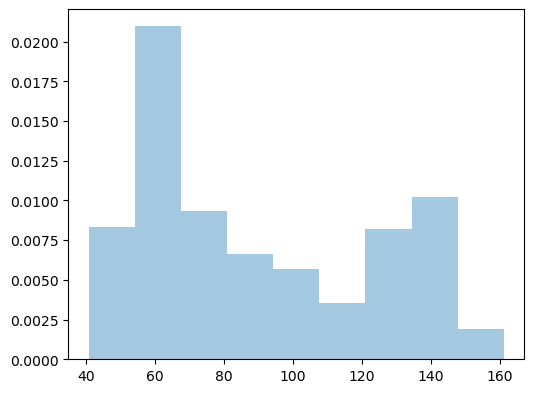

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])

plt.show()


In [19]:
# Convert 'year' column to datetime type
df['year'] = pd.to_datetime(df['year'])

# Group by 'year' and calculate the mean for each numeric column
data_grouped = df.groupby(df['year'].dt.year).mean()

# Plot the grouped data
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()

plt.show()



TypeError: agg function failed [how->mean,dtype->object]

In [20]:
df.groupby('is_quarter_end').mean()


TypeError: agg function failed [how->mean,dtype->object]